# Project 4 - Hackathon (Predicting Income under Team Features Constraint)

* Choose algorithm and choice of samples
* Limited to a maximum of 20 features

### This exercise is to build the best model possible under those constraints. 

### The task is to predict if a person's income is in excess of 50,000 dollars given certain profile information, and more specifically to generate predicted probabilities of income being above 50,000 dollars for each row in the test set. The output will be a .csv file with a single column of the probability with 'wage' as a header. The file is to be submitted by the end of the day.

### This section is the EDA portion. The data set is the 'large_train_sample.cvs' file and is provided.
 

In [94]:
#import some important stuff
import pandas as pd
import numpy as np

from scipy import stats

import matplotlib.pyplot as plt
# import seaborn as sns
%matplotlib inline



In [95]:
# Function cat_tt
# t-tests to see if given category's values are significant 
# Note: code written by Magnus Bigelow
def cat_tt(df, col, y, a = 0.05):
    # list of unique strings in the column
    unique = df[col].unique()
    # print H_0 and H_A
    print(f'h_0: mean {y} given {col} = x == mean {y} given {col} != x. \n')
    print(f'h_a: mean {y} given {col} = x != mean {y} given {col} != x. \n')
    print(f'Significance level of {a}\n\n')
    # loop through each unique string
    for cat in unique:
        # create control that is everything but that string
        # trt that is that string for mean of df[y]
        ctrl = df.loc[df[col]!=cat,y]
        trt = df.loc[df[col]==cat,y]
        # create t test
        tt = stats.ttest_ind(trt,ctrl,equal_var=False)
        # using alpha of 0.05 determine if 
        # y values for given categorical string are
        # significantly different from others
        if tt.pvalue < a:
            print(f'For {cat} reject h_0: p-value of {tt.pvalue}')
        else:
            print(f'For {cat} Fail to reject h_0: p-value of {tt.pvalue}')


In [96]:
# Function: cat_mean_median
# t-tests to see if given category's values are significant
# Note: code written by Magnus Bigelow
def cat_mean_median(df, col, y):
    # list of unique strings in the column
    unique = df[col].unique()
    for cat in unique:
        # Get mean and median y
        print(f'Mean {y} given {col} == {cat}: {np.round(df[df[col] == cat][y].mean(),3)}')
        print(f'Median {y} given {col} == {cat}: {np.round(df[df[col] == cat][y].median(),3)}\n')

In [97]:
# Read in the data (large_train_sample.csv and test_data.csv)

df_train_data = pd.read_csv('./data/large_train_sample.csv')
df_test_data = pd.read_csv('./data/test_data.csv')


### Evaluate the training data

The link to the data definition can be accesed here [here](https://archive.ics.uci.edu/ml/datasets/adult). 

In [98]:
# Shape
df_train_data.shape

(32561, 14)

In [99]:
# First 5 rows of data
df_train_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,wage
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K


In [100]:
# First 5 rows of data
df_train_data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [101]:
df_train_data.isnull().sum().sum()

0

### Initial Analysis:

- No null value found
- Per the data definition, did not find any issues with the data.

- Tasks 
    - I was asigned to look at the following columns: age, workclass, fnlwgt, education, education-num, marital-status, and occupation.	 
    - Change 'wage' to binary where '1' is greater than 50 and '0' for the rest.
    - Create 4 sub-classes within the 'workclass' data.
    - Remove the 'fnlwgt' column
    - Remove the 'education column
    - Leave the 'education-num' column alone
    - Create dummy values, 0 and 1, for marital-status. 0 = 'married', 1 = 'single'
    - Create 4 sub-classes within the 'occupation' data.



In [102]:
# get wage count information
df_train_data['wage'].value_counts()

 <=50K    24720
 >50K      7841
Name: wage, dtype: int64

In [103]:
# change the wage data into 1, 0 where 1 is > 50

df_train_data['wage_1'] = df_train_data['wage'].map(lambda x: 0 if x == ' <=50K' else 1)

In [104]:
# check wage count information
df_train_data['wage_1'].value_counts()

0    24720
1     7841
Name: wage_1, dtype: int64

### Age

In [105]:
df_train_data['age'].describe()

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [106]:
df_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
wage              32561 non-null object
wage_1            32561 non-null int64
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


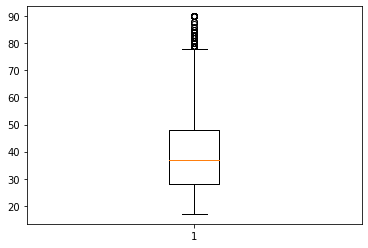

In [107]:
plt.boxplot(df_train_data['age']);

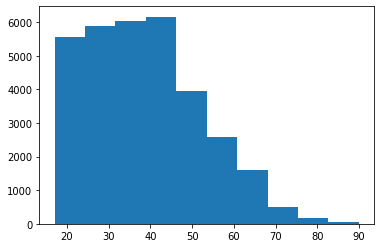

In [108]:
plt.hist(df_train_data['age']);

Age Analysis: No changes to be made. Data is int, with a min value = 17 and max value = 90. Most of the data centered around 30-50.

### Workclass

After evaluating the workclass data in retation to the wage data, The sub-catagories will be combined into 4 groups.

* Private ==> Private
* Federal-gov, State-gov, Local-gov  ==> Government
* Self-emp-not-inc, Self-emp-inc  ==> Self-employed
* ?, Without-pay, Never-worked  ==> Other


In [109]:
cat_tt(df_train_data, 'workclass', 'wage_1')

h_0: mean wage_1 given workclass = x == mean wage_1 given workclass != x. 

h_a: mean wage_1 given workclass = x != mean wage_1 given workclass != x. 

Significance level of 0.05


For  State-gov reject h_0: p-value of 0.01007124502165422
For  Self-emp-not-inc reject h_0: p-value of 2.7356412447344843e-07
For  Private reject h_0: p-value of 1.8833387709766745e-42
For  Federal-gov reject h_0: p-value of 2.6120103864663305e-20
For  Local-gov reject h_0: p-value of 2.1143088938036653e-08
For  ? reject h_0: p-value of 1.8387352664003686e-76
For  Self-emp-inc reject h_0: p-value of 1.8721969637147123e-88
For  Without-pay reject h_0: p-value of 0.0
For  Never-worked reject h_0: p-value of 0.0


In [110]:
cat_mean_median(df_train_data, 'workclass', 'wage_1')

Mean wage_1 given workclass ==  State-gov: 0.272
Median wage_1 given workclass ==  State-gov: 0.0

Mean wage_1 given workclass ==  Self-emp-not-inc: 0.285
Median wage_1 given workclass ==  Self-emp-not-inc: 0.0

Mean wage_1 given workclass ==  Private: 0.219
Median wage_1 given workclass ==  Private: 0.0

Mean wage_1 given workclass ==  Federal-gov: 0.386
Median wage_1 given workclass ==  Federal-gov: 0.0

Mean wage_1 given workclass ==  Local-gov: 0.295
Median wage_1 given workclass ==  Local-gov: 0.0

Mean wage_1 given workclass ==  ?: 0.104
Median wage_1 given workclass ==  ?: 0.0

Mean wage_1 given workclass ==  Self-emp-inc: 0.557
Median wage_1 given workclass ==  Self-emp-inc: 1.0

Mean wage_1 given workclass ==  Without-pay: 0.0
Median wage_1 given workclass ==  Without-pay: 0.0

Mean wage_1 given workclass ==  Never-worked: 0.0
Median wage_1 given workclass ==  Never-worked: 0.0



In [111]:
df_train_data['workclass_com'] = df_train_data['workclass']
df_train_data['workclass_com'] = df_train_data['workclass_com'].map(lambda x: 'Private' if x == ' Private' else x)
df_train_data['workclass_com'] = df_train_data['workclass_com'].map(lambda x: 'Other' if x.strip() in ['?', 'Never-worked', 'Without-pay'] else x)
df_train_data['workclass_com'] = df_train_data['workclass_com'].map(lambda x: 'Government' if x.strip() in ['Federal-gov', 'State-gov', 'Local-gov'] else x)
df_train_data['workclass_com'] = df_train_data['workclass_com'].map(lambda x: 'Self-employed' if x.strip() in ['Self-emp-not-inc', 'Self-emp-inc'] else x)


In [112]:
df_train_data['workclass_com'].value_counts()

Private          22696
Government        4351
Self-employed     3657
Other             1857
Name: workclass_com, dtype: int64

In [113]:
cat_tt(df_train_data, 'workclass_com', 'wage_1')

h_0: mean wage_1 given workclass_com = x == mean wage_1 given workclass_com != x. 

h_a: mean wage_1 given workclass_com = x != mean wage_1 given workclass_com != x. 

Significance level of 0.05


For Government reject h_0: p-value of 2.2575586937256567e-25
For Self-employed reject h_0: p-value of 4.745537823000359e-64
For Private reject h_0: p-value of 1.8833387709766745e-42
For Other reject h_0: p-value of 3.409194414087696e-79


In [114]:
cat_mean_median(df_train_data, 'workclass_com', 'wage_1')

Mean wage_1 given workclass_com == Government: 0.308
Median wage_1 given workclass_com == Government: 0.0

Mean wage_1 given workclass_com == Self-employed: 0.368
Median wage_1 given workclass_com == Self-employed: 0.0

Mean wage_1 given workclass_com == Private: 0.219
Median wage_1 given workclass_com == Private: 0.0

Mean wage_1 given workclass_com == Other: 0.103
Median wage_1 given workclass_com == Other: 0.0



### fnlwgt

https://rpubs.com/H_Zhu/235617

From this site the continuous variable 'fnlwgt' represents final weight, which is the number of units in the target population that the responding unit represents.

We can remove this column

In [115]:
df_train_data['fnlwgt'].value_counts()

164190    13
203488    13
123011    13
113364    12
121124    12
          ..
284211     1
312881     1
177711     1
179758     1
229376     1
Name: fnlwgt, Length: 21648, dtype: int64

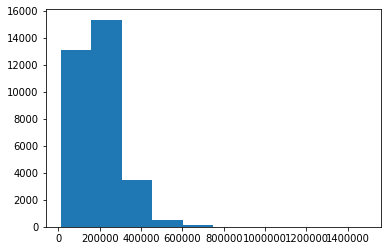

In [116]:
plt.hist(df_train_data['fnlwgt']);

### Education

We will remove this column since we have a column, 'Education-num' that is set up as ordinal numbers that correpond to the level of education. 

In [117]:
df_train_data['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [118]:
df_train_data[df_train_data['education'] == ' Assoc-voc'].head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,wage,wage_1,workclass_com
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Male,0,0,40,?,>50K,1,Private
48,41,State-gov,101603,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Male,0,0,40,United-States,<=50K,0,Government
49,29,Private,271466,Assoc-voc,11,Never-married,Prof-specialty,Not-in-family,Male,0,0,43,United-States,<=50K,0,Private
57,35,Private,56352,Assoc-voc,11,Married-civ-spouse,Other-service,Husband,Male,0,0,40,Puerto-Rico,<=50K,0,Private
90,57,Private,249977,Assoc-voc,11,Married-civ-spouse,Prof-specialty,Husband,Male,0,0,40,United-States,<=50K,0,Private


In [119]:
cat_tt(df_train_data, 'education', 'wage_1')

h_0: mean wage_1 given education = x == mean wage_1 given education != x. 

h_a: mean wage_1 given education = x != mean wage_1 given education != x. 

Significance level of 0.05


For  Bachelors reject h_0: p-value of 4.7090513309864227e-175
For  HS-grad reject h_0: p-value of 3.5754954212137295e-143
For  11th reject h_0: p-value of 5.9133482837479606e-145
For  Masters reject h_0: p-value of 1.87301949779324e-138
For  9th reject h_0: p-value of 3.4296638181896324e-62
For  Some-college reject h_0: p-value of 6.597612768659086e-34
For  Assoc-acdm Fail to reject h_0: p-value of 0.5617915124414661
For  Assoc-voc Fail to reject h_0: p-value of 0.07757258779586264
For  7th-8th reject h_0: p-value of 9.547525306192061e-64
For  Doctorate reject h_0: p-value of 6.470988804511595e-78
For  Prof-school reject h_0: p-value of 1.1114445309706125e-105
For  5th-6th reject h_0: p-value of 5.794488246623711e-45
For  10th reject h_0: p-value of 3.089495121106959e-83
For  1st-4th reject h_0: p-value of 6

In [120]:
cat_tt(df_train_data, 'education', 'wage_1')

h_0: mean wage_1 given education = x == mean wage_1 given education != x. 

h_a: mean wage_1 given education = x != mean wage_1 given education != x. 

Significance level of 0.05


For  Bachelors reject h_0: p-value of 4.7090513309864227e-175
For  HS-grad reject h_0: p-value of 3.5754954212137295e-143
For  11th reject h_0: p-value of 5.9133482837479606e-145
For  Masters reject h_0: p-value of 1.87301949779324e-138
For  9th reject h_0: p-value of 3.4296638181896324e-62
For  Some-college reject h_0: p-value of 6.597612768659086e-34
For  Assoc-acdm Fail to reject h_0: p-value of 0.5617915124414661
For  Assoc-voc Fail to reject h_0: p-value of 0.07757258779586264
For  7th-8th reject h_0: p-value of 9.547525306192061e-64
For  Doctorate reject h_0: p-value of 6.470988804511595e-78
For  Prof-school reject h_0: p-value of 1.1114445309706125e-105
For  5th-6th reject h_0: p-value of 5.794488246623711e-45
For  10th reject h_0: p-value of 3.089495121106959e-83
For  1st-4th reject h_0: p-value of 6

### Education-num

We will leave this alone.


In [121]:
df_train_data['education-num'].value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education-num, dtype: int64

In [122]:
df_train_data.sort_values(by='education-num', ascending=False)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,wage,wage_1,workclass_com
11210,36,Self-emp-not-inc,188972,Doctorate,16,Separated,Prof-specialty,Unmarried,Female,0,0,10,Canada,<=50K,0,Self-employed
4597,55,Private,50164,Doctorate,16,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,60,United-States,>50K,1,Private
7320,38,State-gov,200289,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Male,0,0,40,Taiwan,<=50K,0,Government
13466,42,Self-emp-not-inc,24763,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Male,15024,0,40,United-States,>50K,1,Self-employed
19901,40,State-gov,174283,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Male,0,1887,50,United-States,>50K,1,Government
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25227,23,Private,240049,Preschool,1,Never-married,Other-service,Not-in-family,Female,0,0,40,Laos,<=50K,0,Private
28395,36,Private,252231,Preschool,1,Never-married,Machine-op-inspct,Not-in-family,Male,0,0,40,Puerto-Rico,<=50K,0,Private
32432,36,Private,208068,Preschool,1,Divorced,Other-service,Not-in-family,Male,0,0,72,Mexico,<=50K,0,Private
8080,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,Male,0,0,50,Mexico,<=50K,0,Private


### Marital-status

After evaluating the marital-statu data in relation to the wage data, The sub-catagories will be combined into 2 dummy groups. 

* Married ===> '0'
* Single ===> '1'

The following catagories will be combined:
* Married-civ-spouse, Married-AF-spouse ==> '0'
* Never-married, Divorced, Separated, Widowed, Married-spouse-absent  ==> '1'


In [123]:
cat_tt(df_train_data, 'marital-status', 'wage_1')

h_0: mean wage_1 given marital-status = x == mean wage_1 given marital-status != x. 

h_a: mean wage_1 given marital-status = x != mean wage_1 given marital-status != x. 

Significance level of 0.05


For  Never-married reject h_0: p-value of 0.0
For  Married-civ-spouse reject h_0: p-value of 0.0
For  Divorced reject h_0: p-value of 1.6696270889211297e-186
For  Married-spouse-absent reject h_0: p-value of 1.8749903293540503e-28
For  Separated reject h_0: p-value of 2.916880964339019e-95
For  Married-AF-spouse Fail to reject h_0: p-value of 0.07987499836452418
For  Widowed reject h_0: p-value of 2.837625374220586e-60


In [124]:
cat_mean_median(df_train_data, 'marital-status', 'wage_1')

Mean wage_1 given marital-status ==  Never-married: 0.046
Median wage_1 given marital-status ==  Never-married: 0.0

Mean wage_1 given marital-status ==  Married-civ-spouse: 0.447
Median wage_1 given marital-status ==  Married-civ-spouse: 0.0

Mean wage_1 given marital-status ==  Divorced: 0.104
Median wage_1 given marital-status ==  Divorced: 0.0

Mean wage_1 given marital-status ==  Married-spouse-absent: 0.081
Median wage_1 given marital-status ==  Married-spouse-absent: 0.0

Mean wage_1 given marital-status ==  Separated: 0.064
Median wage_1 given marital-status ==  Separated: 0.0

Mean wage_1 given marital-status ==  Married-AF-spouse: 0.435
Median wage_1 given marital-status ==  Married-AF-spouse: 0.0

Mean wage_1 given marital-status ==  Widowed: 0.086
Median wage_1 given marital-status ==  Widowed: 0.0



In [125]:
df_train_data['marital_status_num'] = df_train_data['marital-status'].map(lambda x: 1 if x.strip() in ['Married-civ-spouse', 'Married-AF-spouse'] else 0)

In [126]:
df_train_data['marital_status_num'].value_counts()

0    17562
1    14999
Name: marital_status_num, dtype: int64

In [127]:
cat_mean_median(df_train_data, 'marital_status_num', 'wage_1')

Mean wage_1 given marital_status_num == 0: 0.065
Median wage_1 given marital_status_num == 0: 0.0

Mean wage_1 given marital_status_num == 1: 0.447
Median wage_1 given marital_status_num == 1: 0.0



In [128]:
cat_tt(df_train_data, 'marital_status_num', 'wage_1')

h_0: mean wage_1 given marital_status_num = x == mean wage_1 given marital_status_num != x. 

h_a: mean wage_1 given marital_status_num = x != mean wage_1 given marital_status_num != x. 

Significance level of 0.05


For 0 reject h_0: p-value of 0.0
For 1 reject h_0: p-value of 0.0


### Occupation

After evaluating the occupation data in relation to the wage data, The sub-catagories will be combined into 5 groups.

* Prof-specialty, Exec-managerial ==> professional
* Priv-house-serv, Handlers-cleaners  ==> house_services
* Machine-op-inspct, Transport-moving, Craft-repair, Farming-fishing  ==> specialty
* Tech-support, Protective-serv, Sales ==> tech/sales
* '?', 'Other-service', 'Adm-clerical', 'Armed-Forces'  ==> other


In [129]:
df_train_data['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [130]:
cat_mean_median(df_train_data, 'occupation', 'wage_1')

Mean wage_1 given occupation ==  Adm-clerical: 0.134
Median wage_1 given occupation ==  Adm-clerical: 0.0

Mean wage_1 given occupation ==  Exec-managerial: 0.484
Median wage_1 given occupation ==  Exec-managerial: 0.0

Mean wage_1 given occupation ==  Handlers-cleaners: 0.063
Median wage_1 given occupation ==  Handlers-cleaners: 0.0

Mean wage_1 given occupation ==  Prof-specialty: 0.449
Median wage_1 given occupation ==  Prof-specialty: 0.0

Mean wage_1 given occupation ==  Other-service: 0.042
Median wage_1 given occupation ==  Other-service: 0.0

Mean wage_1 given occupation ==  Sales: 0.269
Median wage_1 given occupation ==  Sales: 0.0

Mean wage_1 given occupation ==  Craft-repair: 0.227
Median wage_1 given occupation ==  Craft-repair: 0.0

Mean wage_1 given occupation ==  Transport-moving: 0.2
Median wage_1 given occupation ==  Transport-moving: 0.0

Mean wage_1 given occupation ==  Farming-fishing: 0.116
Median wage_1 given occupation ==  Farming-fishing: 0.0

Mean wage_1 given

In [131]:
cat_tt(df_train_data, 'occupation', 'wage_1')

h_0: mean wage_1 given occupation = x == mean wage_1 given occupation != x. 

h_a: mean wage_1 given occupation = x != mean wage_1 given occupation != x. 

Significance level of 0.05


For  Adm-clerical reject h_0: p-value of 4.34997206421731e-83
For  Exec-managerial reject h_0: p-value of 2.3387874767759288e-226
For  Handlers-cleaners reject h_0: p-value of 3.6281815223797586e-131
For  Prof-specialty reject h_0: p-value of 7.192254114663988e-176
For  Other-service reject h_0: p-value of 0.0
For  Sales reject h_0: p-value of 3.56383202395801e-05
For  Craft-repair reject h_0: p-value of 0.020914972616090727
For  Transport-moving reject h_0: p-value of 3.904013355569732e-05
For  Farming-fishing reject h_0: p-value of 5.2437083029024904e-33
For  Machine-op-inspct reject h_0: p-value of 5.64573237099448e-54
For  Tech-support reject h_0: p-value of 1.776147482518739e-05
For  ? reject h_0: p-value of 2.2820676164668833e-77
For  Protective-serv reject h_0: p-value of 4.273714225996773e-06
For

In [132]:
df_train_data['occupation_com'] = df_train_data['occupation']
df_train_data['occupation_com'] = df_train_data['occupation_com'].map(lambda x: 'professional' if x.strip() in ['Prof-specialty', 'Exec-managerial'] else x)
df_train_data['occupation_com'] = df_train_data['occupation_com'].map(lambda x: 'house_services' if x.strip() in ['Priv-house-serv', 'Handlers-cleaners'] else x)
df_train_data['occupation_com'] = df_train_data['occupation_com'].map(lambda x: 'specialty' if x.strip() in ['Machine-op-inspct', 'Transport-moving', 'Craft-repair', 'Farming-fishing'] else x)
df_train_data['occupation_com'] = df_train_data['occupation_com'].map(lambda x: 'tech/sales' if x.strip() in ['Tech-support', 'Protective-serv', 'Sales'] else x)
df_train_data['occupation_com'] = df_train_data['occupation_com'].map(lambda x: 'other' if x.strip() in ['?', 'Other-service', 'Adm-clerical', 'Armed-Forces'] else x)


In [133]:
df_train_data['occupation_com'].value_counts()

other             8917
specialty         8692
professional      8206
tech/sales        5227
house_services    1519
Name: occupation_com, dtype: int64

In [134]:
cat_mean_median(df_train_data, 'occupation_com', 'wage_1')

Mean wage_1 given occupation_com == other: 0.094
Median wage_1 given occupation_com == other: 0.0

Mean wage_1 given occupation_com == professional: 0.466
Median wage_1 given occupation_com == professional: 0.0

Mean wage_1 given occupation_com == house_services: 0.057
Median wage_1 given occupation_com == house_services: 0.0

Mean wage_1 given occupation_com == tech/sales: 0.283
Median wage_1 given occupation_com == tech/sales: 0.0

Mean wage_1 given occupation_com == specialty: 0.186
Median wage_1 given occupation_com == specialty: 0.0



In [135]:
cat_tt(df_train_data, 'occupation_com', 'wage_1')

h_0: mean wage_1 given occupation_com = x == mean wage_1 given occupation_com != x. 

h_a: mean wage_1 given occupation_com = x != mean wage_1 given occupation_com != x. 

Significance level of 0.05


For other reject h_0: p-value of 0.0
For professional reject h_0: p-value of 0.0
For house_services reject h_0: p-value of 3.7670536875513317e-163
For tech/sales reject h_0: p-value of 1.6461497838252915e-13
For specialty reject h_0: p-value of 6.986555793167537e-50


### Drop columns

The following columns will be dropped:
- marital-status
- fnlwgt
- education
- workclass
- occupation

In [136]:
df_train_data.drop(['marital-status', 'fnlwgt', 'education', 'workclass', 'occupation'], axis=1, inplace=True)

### Dummifiying Values

The following columns will be dummified. Note: the drop_first will be set to false. We want to control which columns/data to be dropped

- occupation_com
- workclass_com


In [138]:
df_train_data = pd.get_dummies(df_train_data, columns= ['occupation_com', 'workclass_com'])

# Set up new data frame

This section is the quick reduced version of the code above. Its set up so that it can be passed between team members.
Bring in the training data, change data, and save data

In [139]:
df_train_data = pd.read_csv('./data/large_train_sample.csv')

In [140]:
df_train_data['wage_1'] = df_train_data['wage'].map(lambda x: 0 if x == ' <=50K' else 1)

In [141]:
df_train_data['workclass_com'] = df_train_data['workclass']
df_train_data['workclass_com'] = df_train_data['workclass_com'].map(lambda x: 'Private' if x == ' Private' else x)
df_train_data['workclass_com'] = df_train_data['workclass_com'].map(lambda x: 'Other' if x.strip() in ['?', 'Never-worked', 'Without-pay'] else x)
df_train_data['workclass_com'] = df_train_data['workclass_com'].map(lambda x: 'Government' if x.strip() in ['Federal-gov', 'State-gov', 'Local-gov'] else x)
df_train_data['workclass_com'] = df_train_data['workclass_com'].map(lambda x: 'Self-employed' if x.strip() in ['Self-emp-not-inc', 'Self-emp-inc'] else x)

In [142]:
df_train_data['marital_status_num'] = df_train_data['marital-status'].map(lambda x: 1 if x.strip() in ['Married-civ-spouse', 'Married-AF-spouse'] else 0)


In [143]:
df_train_data['occupation_com'] = df_train_data['occupation']
df_train_data['occupation_com'] = df_train_data['occupation_com'].map(lambda x: 'professional' if x.strip() in ['Prof-specialty', 'Exec-managerial'] else x)
df_train_data['occupation_com'] = df_train_data['occupation_com'].map(lambda x: 'house_services' if x.strip() in ['Priv-house-serv', 'Handlers-cleaners'] else x)
df_train_data['occupation_com'] = df_train_data['occupation_com'].map(lambda x: 'specialty' if x.strip() in ['Machine-op-inspct', 'Transport-moving', 'Craft-repair', 'Farming-fishing'] else x)
df_train_data['occupation_com'] = df_train_data['occupation_com'].map(lambda x: 'tech/sales' if x.strip() in ['Tech-support', 'Protective-serv', 'Sales'] else x)
df_train_data['occupation_com'] = df_train_data['occupation_com'].map(lambda x: 'other' if x.strip() in ['?', 'Other-service', 'Adm-clerical', 'Armed-Forces'] else x)


In [144]:
df_train_data.drop(['marital-status', 'fnlwgt', 'education', 'workclass', 'occupation'], axis=1, inplace=True)

In [145]:
df_train_data = pd.get_dummies(df_train_data, columns= ['occupation_com', 'workclass_com'])

The next section is code from Magnus Bigelow

In [146]:
df_train_data['sex'] = df_train_data['sex'].map(lambda x: 0 if x == ' male' else 1)

In [147]:
df_train_data.drop(['relationship', 'native-country'], axis=1, inplace=True)

View the data

In [148]:
df_train_data.head()

,age,education-num,sex,capital-gain,capital-loss,hours-per-week,wage,wage_1,marital_status_num,occupation_com_house_services,occupation_com_other,occupation_com_professional,occupation_com_specialty,occupation_com_tech/sales,workclass_com_Government,workclass_com_Other,workclass_com_Private,workclass_com_Self-employed
0,39,13,1,2174,0,40,<=50K,0,0,0,1,0,0,0,1,0,0,0
1,50,13,1,0,0,13,<=50K,0,1,0,0,1,0,0,0,0,0,1
2,38,9,1,0,0,40,<=50K,0,0,1,0,0,0,0,0,0,1,0
3,53,7,1,0,0,40,<=50K,0,1,1,0,0,0,0,0,0,1,0
4,28,13,1,0,0,40,<=50K,0,1,0,0,1,0,0,0,0,1,0


In [149]:
df_train_data.shape

(32561, 18)

Save the data

In [150]:
df_train_data.to_csv('./data/clean_train_1.csv', index=False)


# Test data

### Retrieve the test data and perform the same alteration as the training data, then save the data
Note: no 'wage' data in this data set

In [81]:
df_test_data = pd.read_csv('./data/test_data.csv')

In [82]:
df_test_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Male,0,0,40,United-States
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,Male,0,0,50,United-States
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,Male,0,0,40,United-States
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Male,7688,0,40,United-States
4,18,?,103497,Some-college,10,Never-married,?,Own-child,Female,0,0,30,United-States


In [83]:
df_test_data.shape

(16281, 13)

In [84]:
df_test_data['workclass_com'] = df_test_data['workclass']
df_test_data['workclass_com'] = df_test_data['workclass_com'].map(lambda x: 'Private' if x == ' Private' else x)
df_test_data['workclass_com'] = df_test_data['workclass_com'].map(lambda x: 'Other' if x.strip() in ['?', 'Never-worked', 'Without-pay'] else x)
df_test_data['workclass_com'] = df_test_data['workclass_com'].map(lambda x: 'Government' if x.strip() in ['Federal-gov', 'State-gov', 'Local-gov'] else x)
df_test_data['workclass_com'] = df_test_data['workclass_com'].map(lambda x: 'Self-employed' if x.strip() in ['Self-emp-not-inc', 'Self-emp-inc'] else x)

In [85]:
df_test_data['marital_status_num'] = df_train_data['marital-status'].map(lambda x: 1 if x.strip() in ['Married-civ-spouse', 'Married-AF-spouse'] else 0)


In [86]:
df_test_data['occupation_com'] = df_test_data['occupation']
df_test_data['occupation_com'] = df_test_data['occupation_com'].map(lambda x: 'professional' if x.strip() in ['Prof-specialty', 'Exec-managerial'] else x)
df_test_data['occupation_com'] = df_test_data['occupation_com'].map(lambda x: 'house_services' if x.strip() in ['Priv-house-serv', 'Handlers-cleaners'] else x)
df_test_data['occupation_com'] = df_test_data['occupation_com'].map(lambda x: 'specialty' if x.strip() in ['Machine-op-inspct', 'Transport-moving', 'Craft-repair', 'Farming-fishing'] else x)
df_test_data['occupation_com'] = df_test_data['occupation_com'].map(lambda x: 'tech/sales' if x.strip() in ['Tech-support', 'Protective-serv', 'Sales'] else x)
df_test_data['occupation_com'] = df_test_data['occupation_com'].map(lambda x: 'other' if x.strip() in ['?', 'Other-service', 'Adm-clerical', 'Armed-Forces'] else x)


In [87]:
df_test_data.drop(['marital-status', 'fnlwgt', 'education', 'workclass', 'occupation'], axis=1, inplace=True)

In [88]:
df_test_data = pd.get_dummies(df_test_data, columns= ['occupation_com', 'workclass_com'])

In [89]:
df_test_data['sex'] = df_test_data['sex'].map(lambda x: 0 if x == ' male' else 1)

In [90]:
df_test_data.drop(['relationship', 'native-country'], axis=1, inplace=True)

In [91]:
df_test_data.shape

(16281, 16)

In [92]:
df_test_data.head().T

,0,1,2,3,4
age,25,38,28,44,18
education-num,7,9,12,10,10
sex,1,1,1,1,1
capital-gain,0,0,0,7688,0
capital-loss,0,0,0,0,0
hours-per-week,40,50,40,40,30
marital_status_num,0,1,0,1,1
occupation_com_house_services,0,0,0,0,0
occupation_com_other,0,0,0,0,1
occupation_com_professional,0,0,0,0,0


In [93]:
df_test_data.to_csv('./data/clean_test_1.csv', index=False)